# XGBRegressor

In [6]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

## Defining and fitting the model

In [33]:
xgbr = xgb.XGBRegressor(base_score=0.5, 
             booster='gbtree', 
             colsample_bylevel=1,
             colsample_bynode=1, 
             colsample_bytree=1, 
             gamma=0,
             importance_type='gain', 
             learning_rate=0.1, 
             max_delta_step=0,
             max_depth=3, 
             min_child_weight=1, 
             missing=0, 
             n_estimators=100,
             n_jobs=1, 
             nthread=None, 
             objective='reg:squarederror', 
             random_state=0,
             reg_alpha=0, 
             reg_lambda=1, 
             scale_pos_weight=1, 
             seed=None,
             subsample=1
)

In [34]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=0, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=0, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

## Predicting and checking the results

In [38]:
# We can also apply the cross-validation method to 
# evaluate the training score.

score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9748383059758858


In [36]:
# We can also apply the cross-validation method 
# to evaluate the training score.

scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.90


In [37]:
# Or if you want to use the KFlold method in 
# cross-validation it goes as below.

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.87


### Next, we can predict test data, then check the prediction accuracy. Here, we'll use MSE and RMSE as accuracy metrics.

In [52]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 15.13
RMSE: 3.89


### Finally, we'll visualize the original and predicted test data in a plot to compare visually.

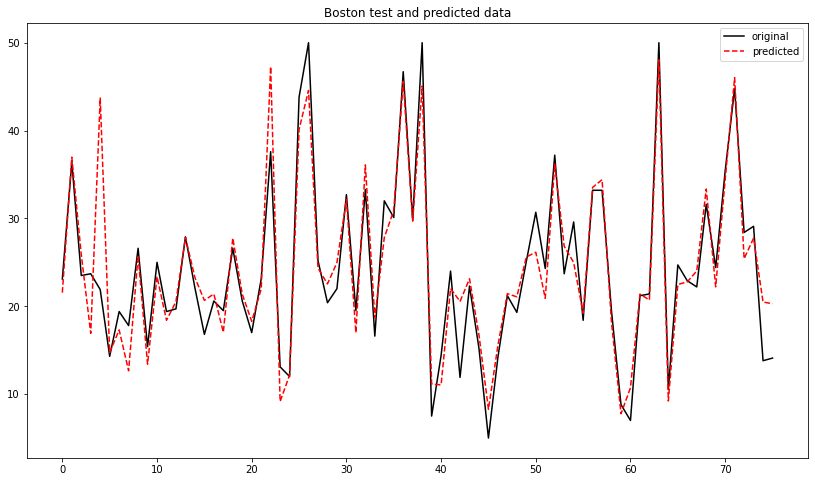

In [53]:
plt.figure(figsize=(14,8))
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original", color="black")
plt.plot(x_ax, ypred, label="predicted", color="red", ls="--")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()